# LangGraph Agent
## Without tools

## Library Imports

In [13]:
from langchain_core.messages import HumanMessage
#from langchain_anthropic import ChatAnthropic
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, START, StateGraph, MessagesState
import logging
from IPython.display import Image, Markdown, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

## Configure logging

In [3]:
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(
    filename='langgraph_notebook.log',  
    level=logging.INFO,
)

## Configure Agent and Model

In [14]:
#model = ChatAnthropic(model="claude-3-5-sonnet-20240620", temperature=0)
import os
# os.environ["OPENAI_API_KEY"] = 
load_dotenv()
model = ChatOpenAI(model="gpt-4o-mini", temperature=0)


def call_model(state: MessagesState):
    messages = state['messages']
    response = model.invoke(messages)
    return {"messages": [response]}

workflow = StateGraph(MessagesState)

workflow.add_node("agent", call_model)

workflow.add_edge(START, "agent")

checkpointer = MemorySaver()

app = workflow.compile(checkpointer=checkpointer)

## Visualize the Graph

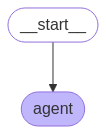

In [8]:
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

## Chat with the Agent

In [15]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="What teams did Joe Montana play for?")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

Joe Montana played for two teams during his NFL career:

1. **San Francisco 49ers** (1979–1992): Montana spent the majority of his career with the 49ers, where he became one of the greatest quarterbacks in NFL history, winning four Super Bowl championships (XVI, XIX, XXIII, XXIV) and earning three Super Bowl MVP awards.

2. **Kansas City Chiefs** (1993–1994): After leaving the 49ers, Montana played for the Chiefs for two seasons before retiring from professional football.

These two teams are where Montana made his mark as a legendary quarterback.

In [10]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="What are the leagues in the SportsWorldCentral fantasy football platform?")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

As of my last update in October 2023, I don't have specific information about the leagues in the SportsWorldCentral fantasy football platform. Fantasy football platforms typically offer various types of leagues, such as:

1. **Standard Leagues**: Traditional scoring formats with standard rules.
2. **PPR Leagues**: Points Per Reception leagues that award points for each reception.
3. **Dynasty Leagues**: Long-term leagues where players are kept from year to year.
4. **Keeper Leagues**: Leagues where teams can keep a certain number of players from one season to the next.
5. **Best Ball Leagues**: Leagues where you draft a team, and the best-performing players are automatically selected each week without the need for lineup management.

For the most accurate and up-to-date information about the specific leagues offered by SportsWorldCentral, I recommend checking their official website or platform directly.

In [11]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="What are the leagues in the MyFantasyLeague fantasy football platform?")]},
    config={"configurable": {"thread_id": 99}}
)
display(Markdown(final_state["messages"][-1].content))

MyFantasyLeague (MFL) is a popular platform for hosting fantasy football leagues, and it offers a variety of league types and formats to cater to different preferences. Here are some of the common league types you can find on MyFantasyLeague:

1. **Standard Leagues**: Traditional leagues with standard scoring rules and roster setups.

2. **PPR Leagues**: Points Per Reception leagues that award points for each reception, often with different scoring for running backs, wide receivers, and tight ends.

3. **Dynasty Leagues**: Long-term leagues where owners keep most or all of their players from year to year, allowing for a more strategic approach to player management.

4. **Keeper Leagues**: Similar to dynasty leagues, but with a limit on the number of players that can be kept each season.

5. **Auction Leagues**: Instead of a traditional draft, teams bid on players using a budget, adding a different strategic element to team building.

6. **Superflex Leagues**: Leagues that allow teams to start a second quarterback in addition to the standard positions, increasing the value of quarterbacks.

7. **IDP Leagues**: Individual Defensive Player leagues where owners draft and manage defensive players separately from offensive players.

8. **Best Ball Leagues**: Leagues where owners draft a team but do not manage lineups; the best-performing players are automatically selected each week.

9. **Custom Leagues**: MyFantasyLeague allows for extensive customization, so league commissioners can create unique scoring systems, roster configurations, and rules.

MyFantasyLeague is known for its flexibility and customization options, making it a popular choice for serious fantasy football players. For the most current offerings and specific league details, it's best to visit the MyFantasyLeague website directly.